# CNN Visualisation

In this notebook we look at how we can visualise and interpret convolutional networks.

CNN's should be easier to gain som einsight from then other forms of deep neural networks gut to their use of filters and feature maps, both of which can be easily visualised.

Code from articles:
* https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [1]:
# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

Using TensorFlow backend.


## Visualise Filters
Plot some filters from VGG. Light represents high activation values

In [2]:
# load the model
model = VGG16()

W0620 18:05:33.728275 27136 deprecation_wrapper.py:119] From c:\appl\applications\miniconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 18:05:33.753279 27136 deprecation_wrapper.py:119] From c:\appl\applications\miniconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 18:05:33.756277 27136 deprecation_wrapper.py:119] From c:\appl\applications\miniconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 18:05:33.792274 27136 deprecation_wrapper.py:119] From c:\appl\applications\miniconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0620 18:05:35.3302

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Get information about the layer names and shapes. We only include layes with conv in the name as this is what VGG16 uses to name convolutional layers

In [4]:
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


Show information about filters in the first hidden layer (block1_conv1)

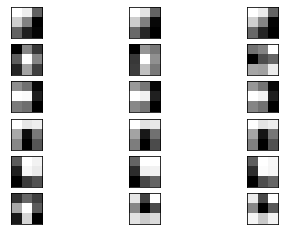

In [5]:
# retrieve weights from the first hidden layer
filters, biases = model.layers[1].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
        
# show the figure
pyplot.show()

Light areas represent larger wieghts, whilst dark smaller weights. Based on this we can see that the filters on the first row detect a gradient from light in the top left to dark in the bottom right.

We only plot a small subset of the filters, however each convolutional layer contains between 64 and 512 such filters so this approach is difficult to scale.

## Visualize Feature Maps
Feature maps capture the result of applying the filters to some input, such as the input image or another feature map.

By visualizing a feature map for a specific input image we ca nunderstand what features of the input are detected or preserved in the feature maps. We would expect feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

To get the feature map from a given convolutional layer, we can create a new model that is a subset of the layers in the full VGG16 model. The model would have the same input layer as the original model, but the output would be the output of a given convolutional layer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
Original image shape: (224, 224, 3)
Expanded image shape: (1, 224, 224, 3)
Output feature map shape: (1, 224, 224, 64)


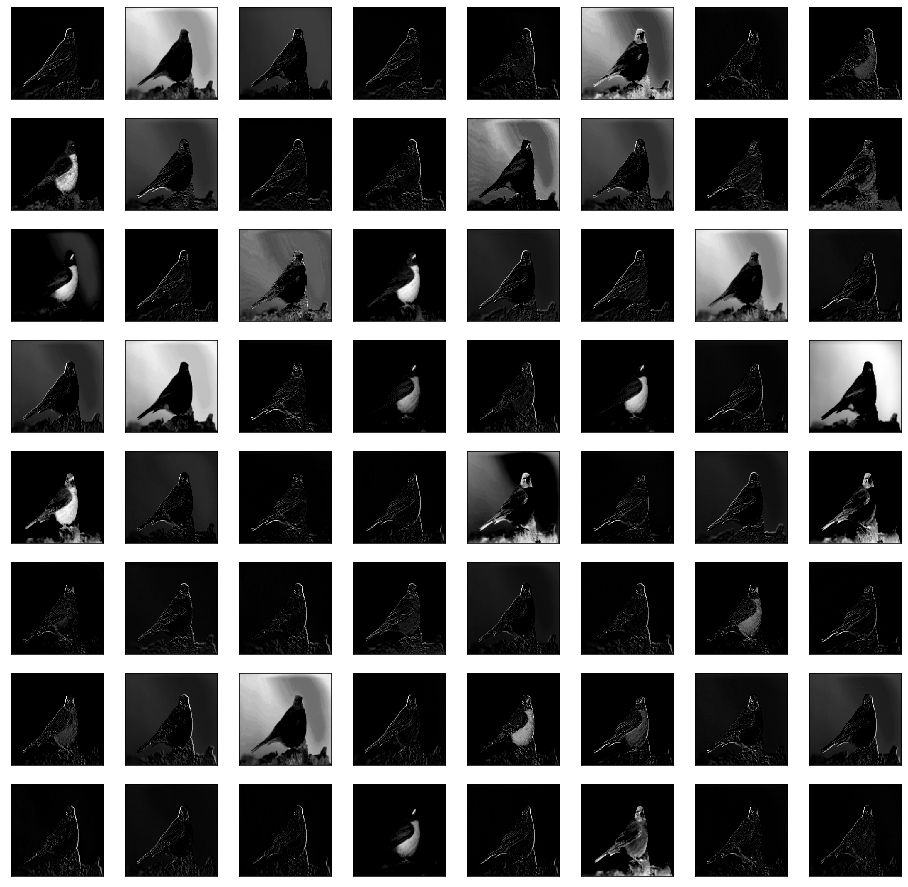

In [12]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
print("Original image shape:", img.shape)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
print("Expanded image shape:", img.shape)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)
print("Output feature map shape:", feature_maps.shape)

# There are 64 feature maps in the output so plot in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(16,16))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

We can see that different filters captuer different parts of the image, some the foreground others the background.

We can extend this further for VGG to plot the output of each 'block' before pooling is done. As some layers have more than 64 feature maps, we cap this at 64. What we notice is that earlier blocks capture more finer features and later blocks, more abstract ones.  

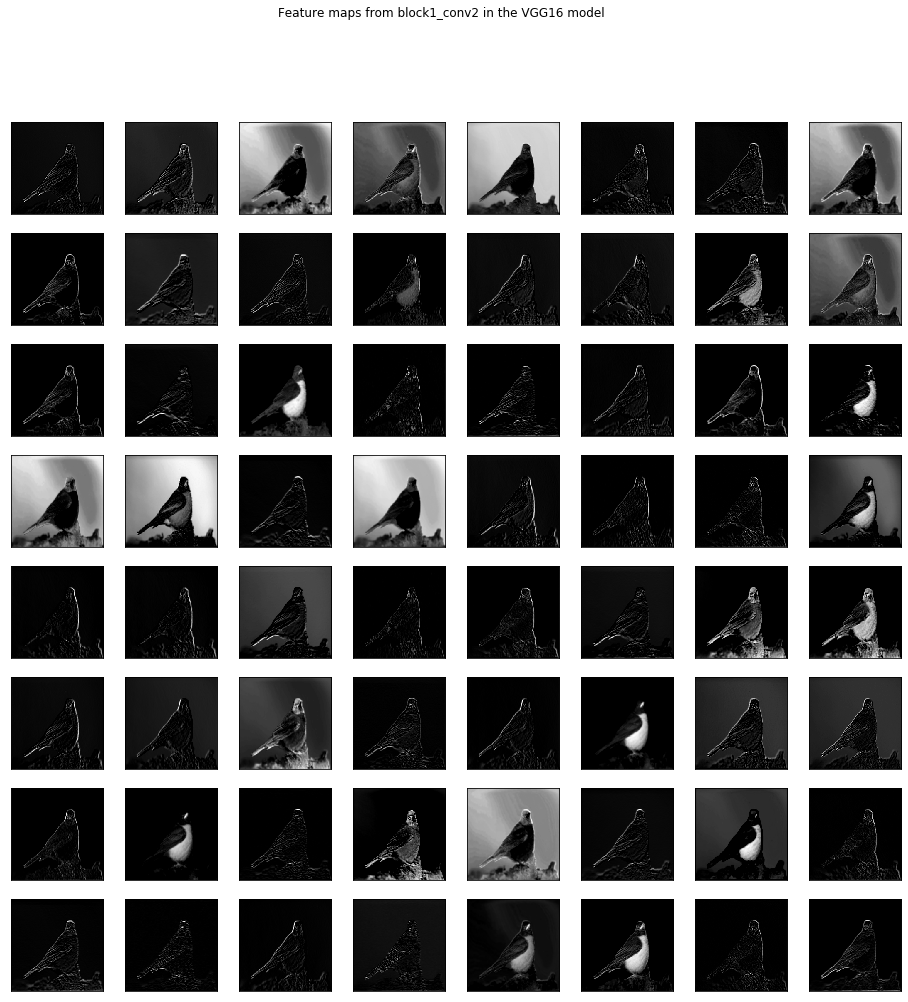

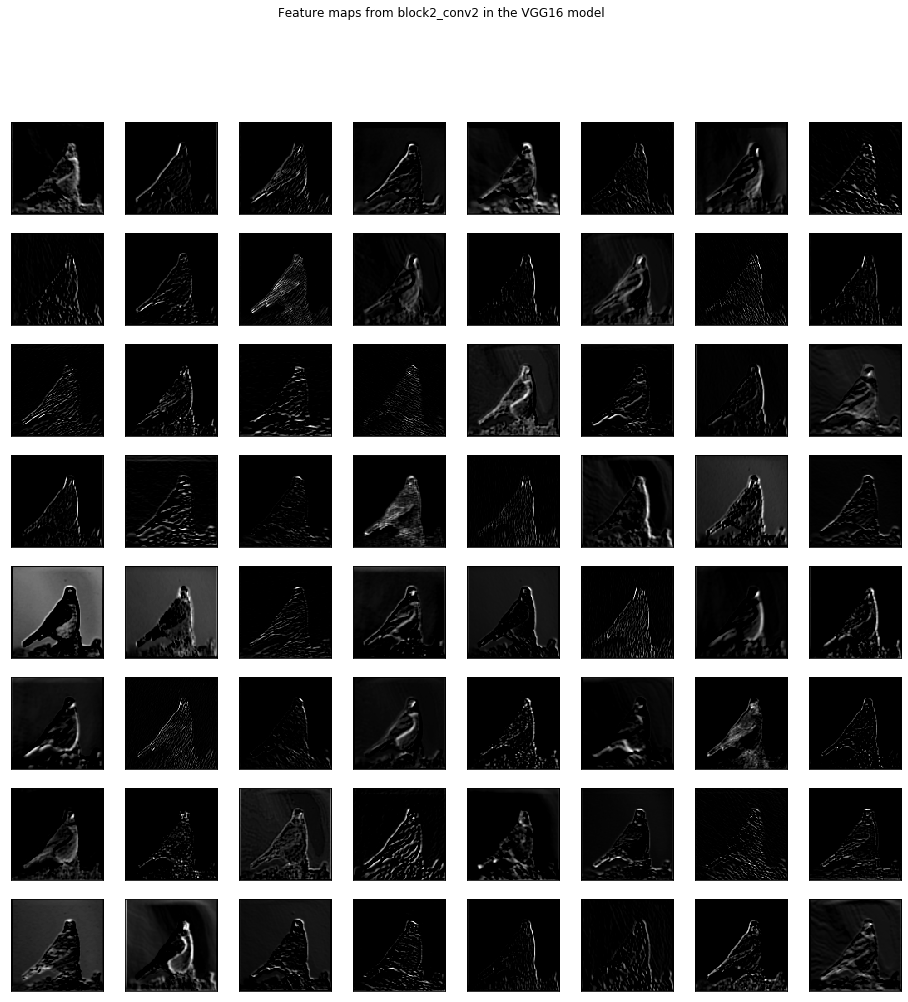

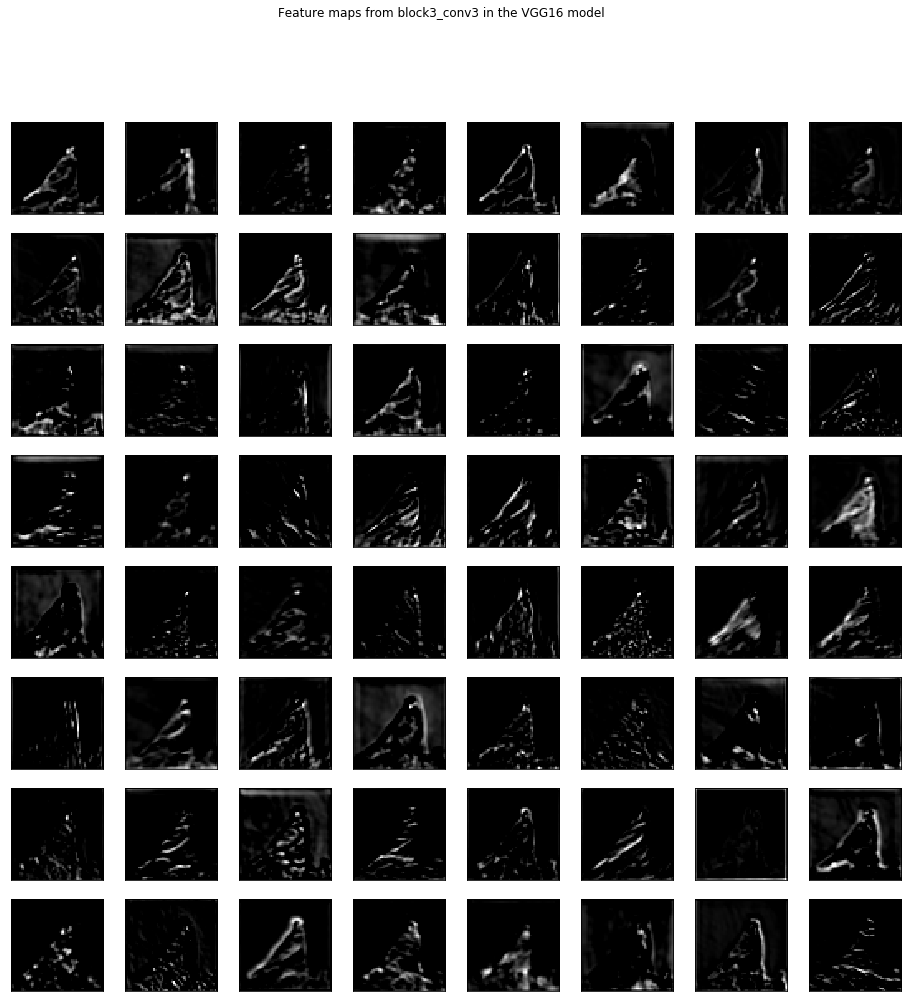

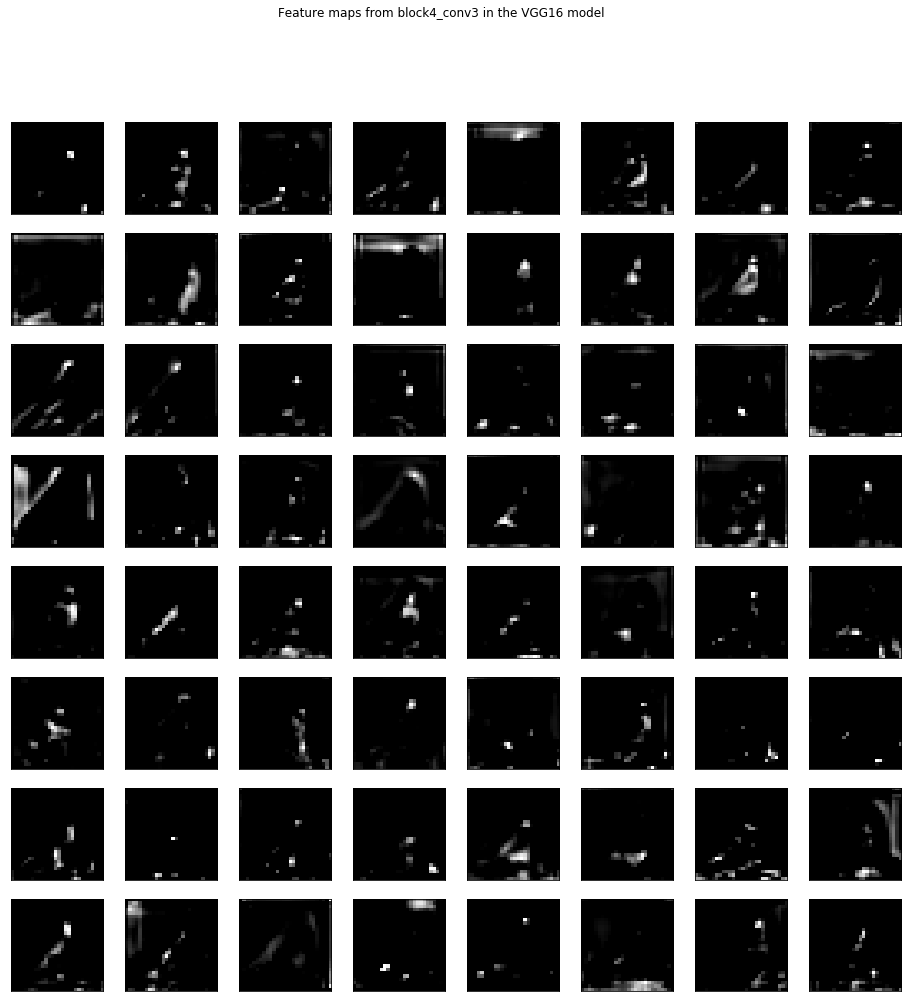

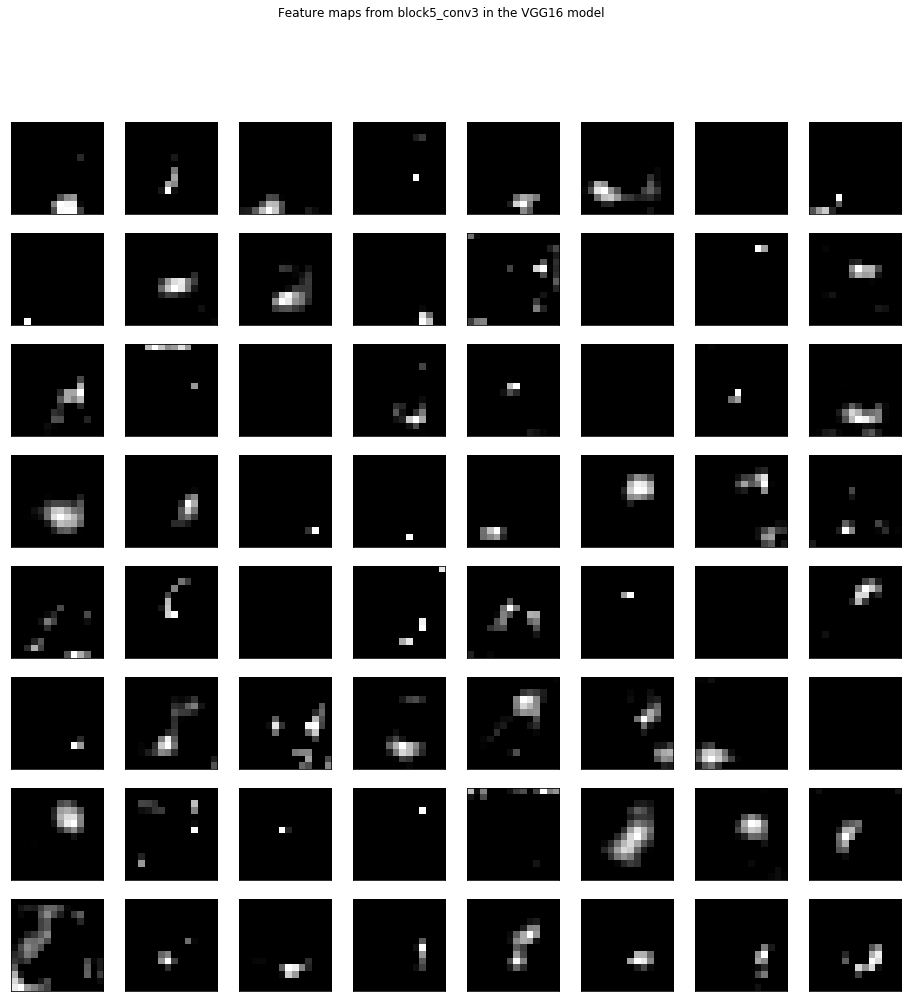

In [19]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for idx, fmap in enumerate(feature_maps):
    plt.figure(figsize=(16,16))
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    plt.suptitle('Feature maps from {} in the VGG16 model'.format(model.layers[ixs[idx]].name))
    plt.show()